In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [44]:
data_name = "dummy"
# data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,1,0,...,0,1,1,0,1,25,235,1,6.0,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,26,1142,0,0.0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,25,562,11,9.0,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,61,214,0,0.0,satisfied
4,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,52,2035,4,0.0,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

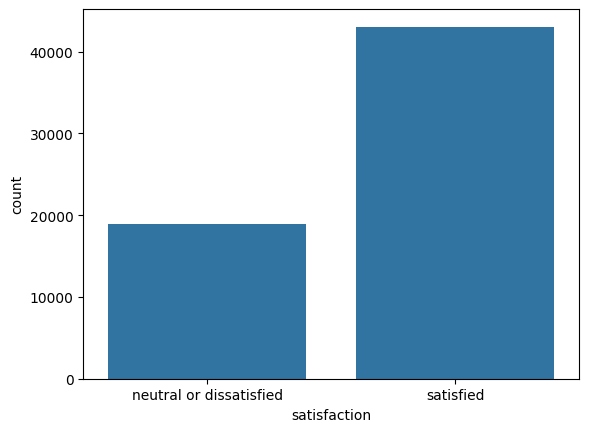

In [45]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

Before Counter({'satisfied': 43050, 'neutral or dissatisfied': 18940})
After Counter({'neutral or dissatisfied': 43050, 'satisfied': 43050})


<Axes: xlabel='count', ylabel='satisfaction'>

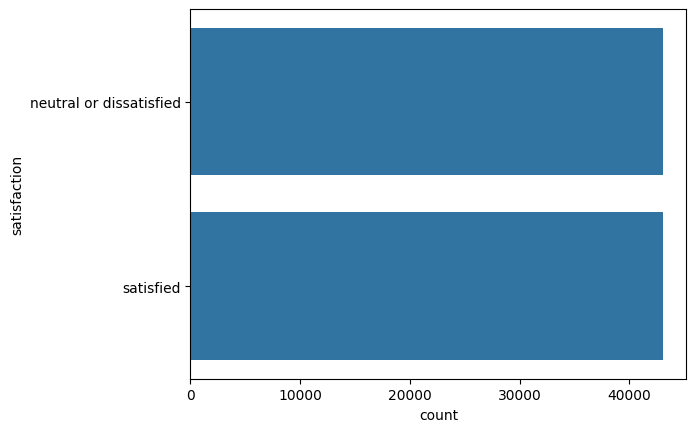

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df["satisfaction"])
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(df_copy.iloc[:,:-1], df["satisfaction"])

counter = Counter(y_train_sm)
print('After', counter)

sns.countplot(data=y_train_sm)

## Train-Test Splitting

In [47]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,1,25,235,1,6.0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,26,1142,0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,9.0
3,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,61,214,0,0.0
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,52,2035,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61985,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,39,404,0,0.0
61986,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,52,280,0,0.0
61987,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,1,34,526,0,0.0
61988,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,23,646,0,0.0


In [48]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
61985    neutral or dissatisfied
61986                  satisfied
61987    neutral or dissatisfied
61988                  satisfied
61989                  satisfied
Name: satisfaction, Length: 61990, dtype: object

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_train_sm,y_train_sm,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (60270, 94) and test set is :(25830, 94)


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17175472, -0.41172704, -0.4919758 , ..., -0.69280075,
        -0.36732383, -0.4010642 ],
       [-0.17175472, -0.41172704, -0.4919758 , ...,  1.93842491,
        -0.39350453, -0.4010642 ],
       [-0.17175472, -0.41172704, -0.4919758 , ...,  0.26962743,
        -0.39350453, -0.4010642 ],
       ...,
       [-0.17175472, -0.41172704,  2.03262031, ..., -1.15547264,
        -0.39350453, -0.4010642 ],
       [-0.17175472, -0.41172704, -0.4919758 , ...,  1.00071966,
        -0.39350453, -0.34903151],
       [-0.17175472, -0.41172704, -0.4919758 , ...,  0.94509308,
        -0.39350453, -0.4010642 ]])

## Set paramiter CV

In [51]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.053248 วินาที


In [53]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 97.17 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.97      0.97     12950
              satisfied       0.97      0.97      0.97     12880

               accuracy                           0.97     25830
              macro avg       0.97      0.97      0.97     25830
           weighted avg       0.97      0.97      0.97     25830



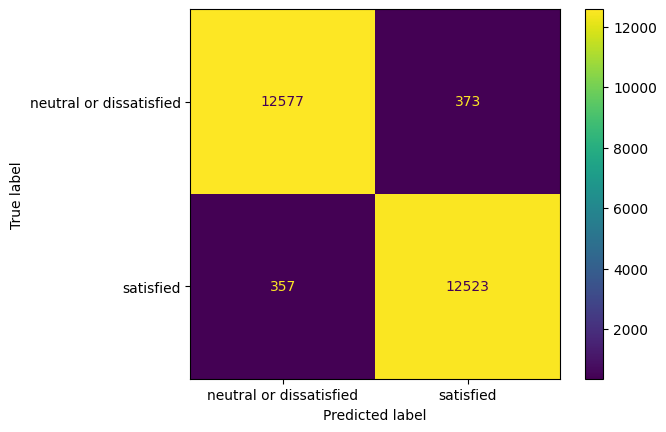

In [54]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [55]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.97237432 0.96864111 0.96988552 0.975112   0.96814335 0.97187656
 0.97486312 0.97486312 0.97088104 0.9726232  0.9701344  0.97710304
 0.9726232  0.97536088 0.97088104]
Mean CV Accuracy: 0.9724
Standard Deviation CV Accuracy: 0.0026
เวลาที่ใช้ในการทำ Cross Validation: 5.683250 วินาที


In [56]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9809689729550357
Test Accuracy: 0.9717382888114595


In [57]:
import pickle
pickle_out = open("../model/model_knn.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [58]:
import pickle
df_t = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
38103,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,34,2058,0,0.0,neutral or dissatisfied
5009,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,28,2133,26,41.0,neutral or dissatisfied
22312,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,71,404,11,23.0,neutral or dissatisfied
48009,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,57,3912,0,0.0,satisfied
46426,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,56,3755,0,0.0,neutral or dissatisfied
15002,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,40,733,0,0.0,satisfied
29654,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,54,3460,0,0.0,satisfied
3772,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,50,523,0,13.0,satisfied
51509,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,40,3625,0,1.0,satisfied
20937,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,50,414,0,6.0,satisfied


In [59]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
38103,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,34,2058,0,0.0
5009,0,0,1,0,0,0,0,0,1,0,...,1,0,1,1,0,1,28,2133,26,41.0
22312,0,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,1,71,404,11,23.0
48009,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,57,3912,0,0.0
46426,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,56,3755,0,0.0
15002,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,40,733,0,0.0
29654,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,54,3460,0,0.0
3772,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,50,523,0,13.0
51509,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,40,3625,0,1.0
20937,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,50,414,0,6.0


In [60]:
y_sam = df_sam.iloc[:,-1]
y_sam


38103    neutral or dissatisfied
5009     neutral or dissatisfied
22312    neutral or dissatisfied
48009                  satisfied
46426    neutral or dissatisfied
15002                  satisfied
29654                  satisfied
3772                   satisfied
51509                  satisfied
20937                  satisfied
59460                  satisfied
32780                  satisfied
3428                   satisfied
56979                  satisfied
22025                  satisfied
31942    neutral or dissatisfied
22191                  satisfied
61174                  satisfied
60470                  satisfied
29888                  satisfied
Name: satisfaction, dtype: object

In [61]:

model = pickle.load(open("../model/model_knn.pkl", 'rb'))
scaler_1 = pickle.load(open("../model/scaler.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

Accuracy of Knn is : 100.0 % .
